# Kaggle hobby project #1
# Breast Cancer Wisconsin (Diagnostic) Data Set
### _Predict whether the cancer is benign or malignant_
* https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
#%matplotlib inline
%matplotlib inline
import seaborn as sns

# some of my data analysis is inspired by the excellent notebook here: https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization

In [2]:
data = pd.read_csv('../data/data.csv')

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#remove unnecessary data
del data['Unnamed: 32']
del data['id']

In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
#sns.pairplot(data, hue='diagnosis', size=1.5); # this is too big to visualize!

### Investage variables for correlation

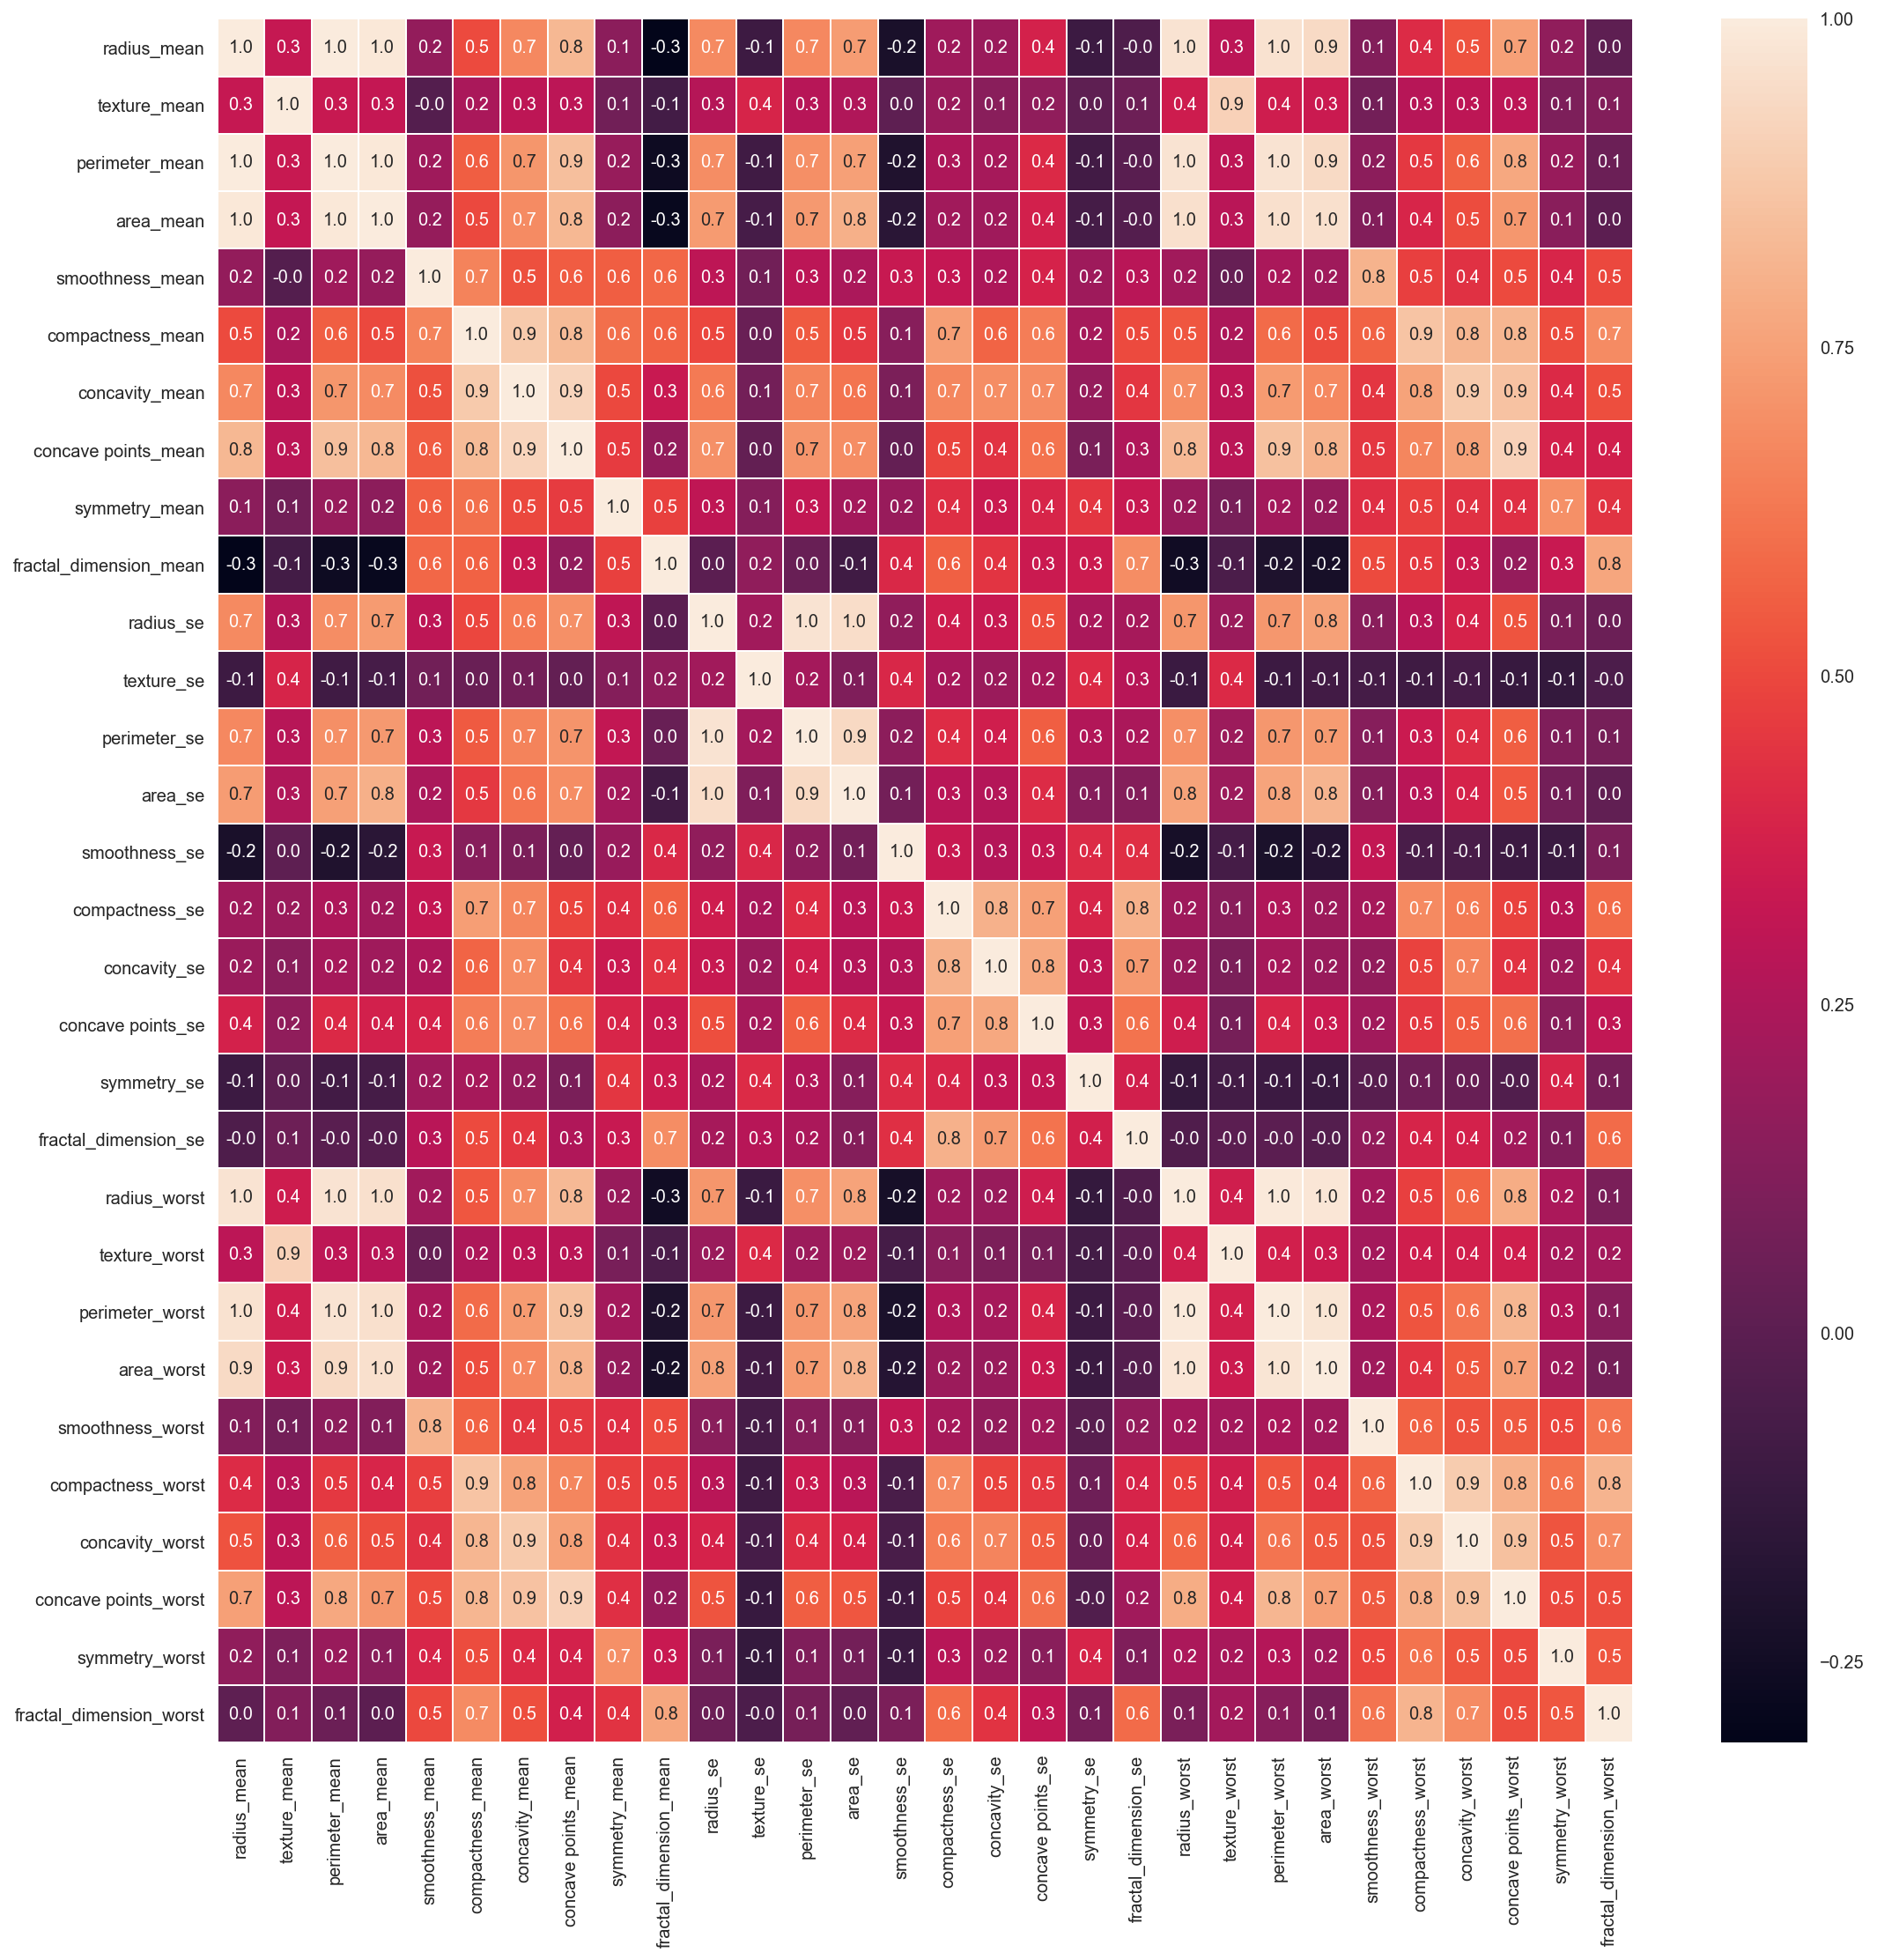

In [7]:
# heat map to look for correlation
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [6]:
# xxx_worst variables seem to correlate a lot so I might try removing these - concavity_worst is not too bad so I might leave this one in. Also, we don't need the diagnosis column in the x's
droplist = ['diagnosis','area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst']

### extract features and target vector

In [7]:
x_data = data.drop(droplist, axis=1)
x_data.shape

(569, 26)

In [8]:
#target vector
y_data = data['diagnosis']
y_data.shape

(569,)

### First pass - A simple Naive Bayes classifier

In [9]:
### simple Gaussian naive bayes
#simple Gaussian naive Bayes
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=8418)

Accuracy is:  0.9181286549707602


<IPython.core.display.Javascript object>


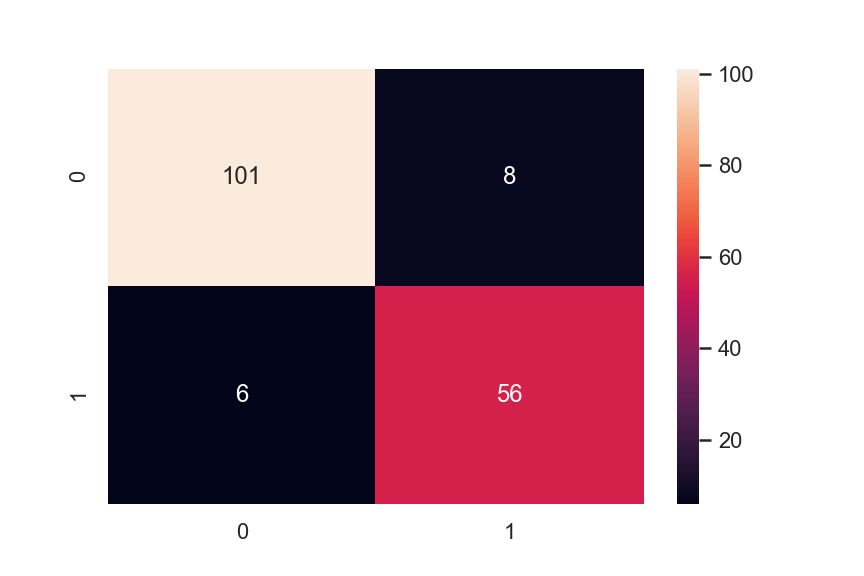

In [23]:
from sklearn.naive_bayes import GaussianNB #choose model class - done
model = GaussianNB() #instantiate the model - done (GaussianNB has no hyperparameters)
model.fit(xtrain, ytrain) #fit the model to the data
y_model = model.predict(xtest) #predict on new data
#finally, use the accuracy_score utility to see the fraction of predicted labels that match their true value:

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,model.predict(xtest))
sns.heatmap(cm,annot=True,fmt="d");

In [12]:
# 92 percent model accuracy with simple Gaussian naive bayes method.

### Try a support vector machine

In [13]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pca = PCA(n_components=25, random_state=8418, svd_solver='randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

#### Hyper-Parameter optimization

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1,5,10,50],
             'svc__gamma': [0.00005, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

In [15]:
grid.fit(xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 50, 'svc__gamma': 5e-05}


In [16]:
# best params: {'svc__C': 5, 'svc__gamma': 5e-05}
model = grid.best_estimator_
yfit = model.predict(xtest)

Accuracy is:  0.9181286549707602


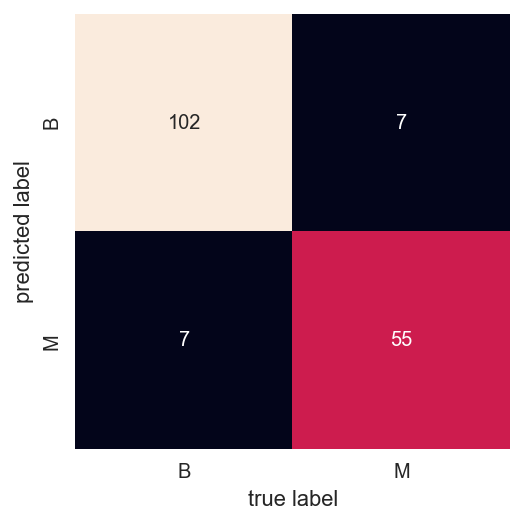

In [17]:
ac = accuracy_score(ytest,model.predict(xtest))
print('Accuracy is: ',ac)

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [18]:
ytest.str.contains(r'B').sum(), ytest.str.contains(r'M').sum(), 

(109, 62)

The support vector machine is 92% accurate, even with optimized parameters. This offers no real improvement over the basic classifier.

#### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
clf_rf = RandomForestClassifier(random_state=8418)      
clr_rf = clf_rf.fit(xtrain,ytrain)

Accuracy is:  0.9649122807017544


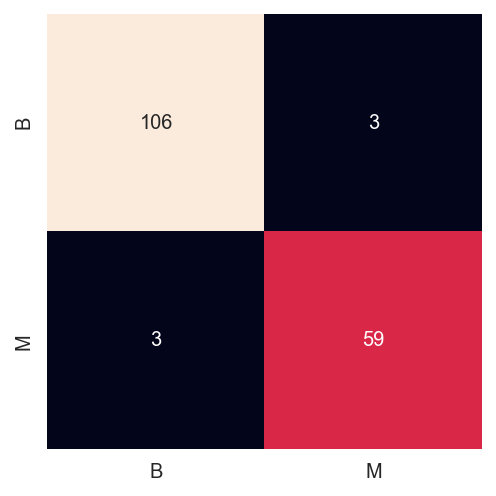

In [21]:
ac = accuracy_score(ytest,clf_rf.predict(xtest))
print('Accuracy is: ',ac)
cm = confusion_matrix(ytest,clf_rf.predict(xtest))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=['B','M'],
            yticklabels=['B','M'])

96% accuracy achieved with the random forest classifier. A slight improvement over naive bayes and svm.

#### Univariate feature selection using the SelectKBest Chi2 function

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find top 5 scoring features using chi2 clustering
select_feature = SelectKBest(chi2, k=5).fit(xtrain, ytrain)

In [23]:
clustering_results = pd.DataFrame()
clustering_results['score'] = select_feature.scores_
clustering_results['feature'] = xtrain.columns
clustering_results = clustering_results.sort_values(['score'], ascending=[False])
clustering_results.head(10)

,score,feature
3,38566.723964,area_mean
13,6664.799071,area_se
2,1414.105679,perimeter_mean
12,190.772043,perimeter_se
0,187.702712,radius_mean
20,134.620104,texture_worst
1,76.472966,texture_mean
23,28.004307,concavity_worst
10,26.775636,radius_se
6,14.182648,concavity_mean


Accuracy is:  0.9005847953216374


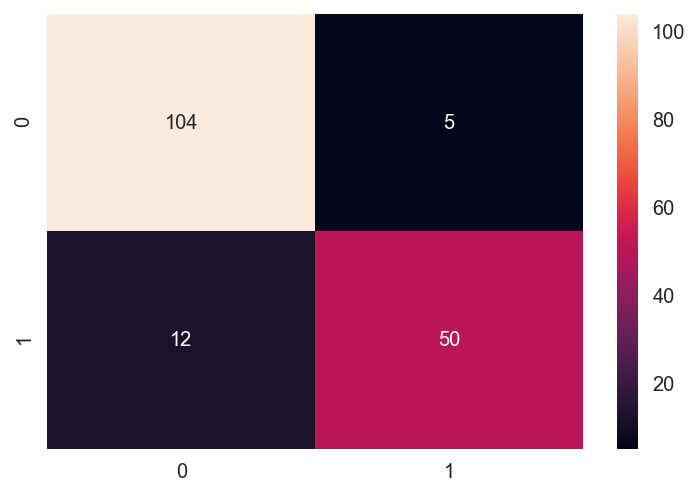

In [24]:
xtrain2 = select_feature.transform(xtrain)
xtest2 = select_feature.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(xtrain2,ytrain)
ac_2 = accuracy_score(ytest,clf_rf_2.predict(xtest2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(ytest,clf_rf_2.predict(xtest2))
sns.heatmap(cm_2,annot=True,fmt="d")

This approach to feature selection has brought signifcantly worse performance!!

In [25]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(xtrain, ytrain)
print('Chosen best 5 feature by rfe:',xtrain.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['radius_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se'],
      dtype='object')


A slightly different selection of variables from Chi2.  Retrying the random forest training:

Accuracy is:  0.9473684210526315


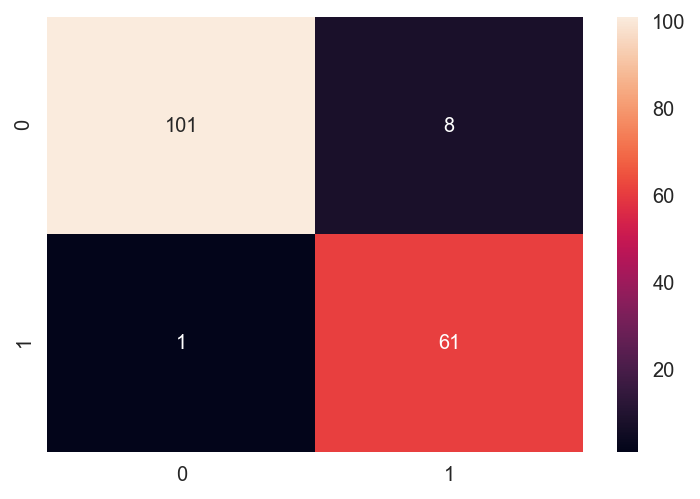

In [26]:
xtrain3 = rfe.transform(xtrain)
xtest3 = rfe.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_3 = RandomForestClassifier()      
clr_rf_3 = clf_rf_3.fit(xtrain3,ytrain)
ac_3 = accuracy_score(ytest,clf_rf_3.predict(xtest3))
print('Accuracy is: ',ac_3)
cm_3 = confusion_matrix(ytest,clf_rf_3.predict(xtest3))
sns.heatmap(cm_3,annot=True,fmt="d");

** bit better than before - 96% accuracy. But only marginally better than the full data set above.  This is the best score by the looks of it. **

### Recursive feature elimination with cross validation and random forest classification

In [27]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(xtrain, ytrain)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'fractal_dimension_se', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


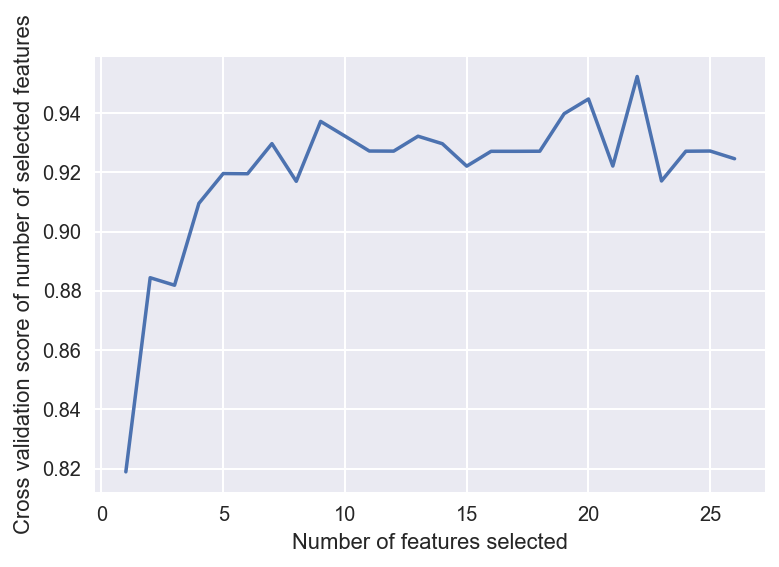

In [28]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [29]:
# levels out at about 9 features

Accuracy is:  0.9649122807017544


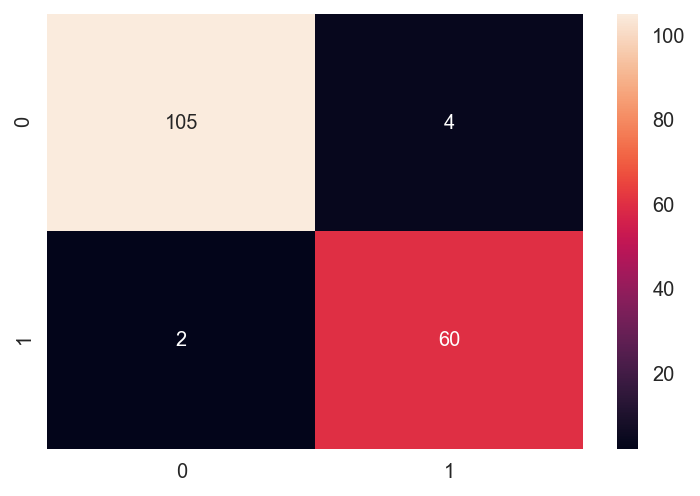

In [30]:
xtrain4 = rfecv.transform(xtrain)
xtest4 = rfecv.transform(xtest)
#random forest classifier with n_estimators=10 (default)
clf_rf_4 = RandomForestClassifier()      
clr_rf_4 = clf_rf_4.fit(xtrain4,ytrain)
ac_4 = accuracy_score(ytest,clf_rf_4.predict(xtest4))
print('Accuracy is: ',ac_4)
cm_4 = confusion_matrix(ytest,clf_rf_4.predict(xtest4))
sns.heatmap(cm_4,annot=True,fmt="d");

**about the same again. Flogging a dead horse at this point. The RFE model above is probably as good as it gets for this data set at 96% accuracy.**

### _Addendum_

#### Principle component analysis (PCA)
* PCA for feature extraction 1st requires normalizing the data:

Text(0,0.5,'explained_variance_ratio_')

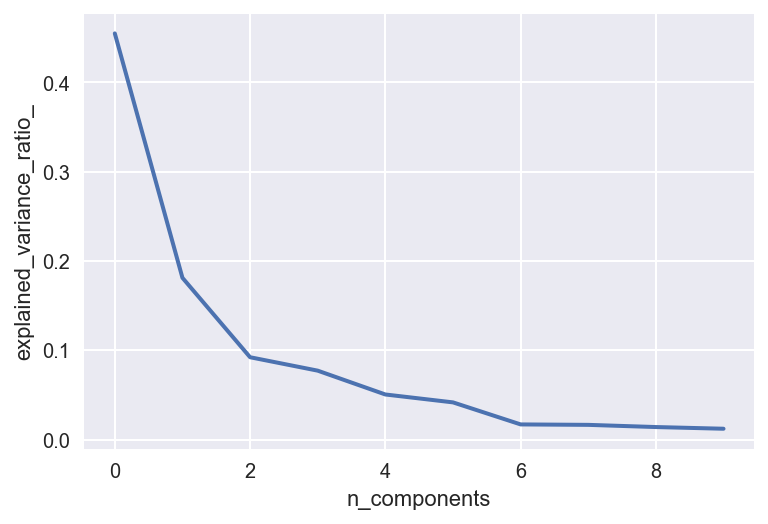

In [31]:
# split data train 70 % and test 30 %
xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.3, random_state=42) #70/30 train/test split
#normalization
xtrain_norm = (xtrain-xtrain.mean())/(xtrain.max()-xtrain.min())
xtest_norm = (xtest-xtest.mean())/(xtest.max()-xtest.min())

from sklearn.decomposition import PCA
#pca = PCA()
pca = PCA(n_components=10) # set number of components to plot table below
pca.fit(xtrain_norm)

plt.figure()
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [32]:
# According to variance ratio, 6 component can be chosen.

In [33]:
#Dump components relations with features:
#https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
pd.DataFrame(pca.components_,columns=xtrain_norm.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
PC-1,0.226917,0.102605,0.241003,0.202754,0.159217,0.320617,0.343458,0.341122,0.168053,0.108114,...,0.090656,0.153348,0.062756,0.079502,0.122862,0.182433,0.271850,0.386950,0.124450,0.173339
PC-2,-0.389761,-0.090688,-0.370462,-0.342233,0.169137,0.127348,-0.030175,-0.154678,0.154252,0.401887,...,0.062840,0.043262,0.132716,0.149618,-0.069794,0.223435,0.142046,0.067141,0.107934,0.303938
PC-3,-0.052628,0.272026,-0.049133,-0.019220,-0.077797,-0.023167,0.024219,-0.031899,0.069910,0.035422,...,0.102889,0.188843,0.369464,0.141511,0.216905,-0.252874,-0.166528,-0.189174,-0.116413,-0.150163
PC-4,0.055726,-0.488860,0.060420,0.076616,0.080314,0.066360,0.090417,0.100889,0.084601,0.089848,...,0.072423,0.157833,0.250558,0.108934,-0.647486,-0.145218,-0.159325,-0.139063,-0.087029,-0.107338
PC-5,-0.031397,-0.000515,-0.026068,-0.055976,-0.456305,0.025532,0.093838,-0.141213,-0.208952,-0.019042,...,0.198928,0.152185,-0.101582,0.188919,-0.062898,-0.506761,0.195423,0.298285,-0.116123,0.117067
PC-6,0.033429,-0.019724,0.025635,-0.007475,-0.161026,-0.036239,-0.087170,-0.051141,0.416757,-0.158809,...,-0.073095,-0.127224,0.515861,-0.117997,0.016009,-0.208969,0.107645,0.022670,0.561702,-0.032960
PC-7,-0.000555,0.132589,-0.002611,0.086659,-0.121989,-0.044968,-0.166856,-0.171156,-0.480795,0.055316,...,-0.107282,-0.212871,0.382779,0.008962,0.030441,0.157871,0.199829,-0.064250,0.061158,0.213526
PC-8,0.017309,-0.017574,0.003542,-0.029565,-0.032124,-0.167810,0.115016,0.051452,-0.229656,-0.358367,...,0.141826,0.179214,0.273801,-0.060642,-0.020057,0.299101,-0.055746,0.261775,0.060668,-0.281020
PC-9,-0.014180,0.433946,-0.009705,-0.035944,-0.006770,0.123200,-0.106530,0.018743,0.345279,0.013164,...,0.021982,0.302287,-0.131696,0.055671,0.053927,-0.025733,-0.059055,-0.303157,-0.019371,-0.138331
PC-10,-0.208198,-0.052501,-0.214598,-0.088278,-0.171319,-0.362567,0.148880,-0.160172,0.283368,-0.169253,...,0.199368,0.055397,-0.194487,0.015995,0.018845,0.154572,-0.147910,0.364417,0.095647,-0.050127


### Tensorflow

In [10]:
# confusion matrix plotting function
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.externals import joblib #for saving the trained model

In [12]:
ytrain.replace(('M', 'B'), (1, 0), inplace=True)
ytest.replace(('M', 'B'), (1, 0), inplace=True) 

In [13]:
# https://towardsdatascience.com/from-scikit-learn-to-tensorflow-part-1-9ee0b96d4c85

# ------------------------------------------
# TensorFlow Implementation
# ------------------------------------------


# Extract the features from the training data
feats = tf.contrib.learn.infer_real_valued_columns_from_input(xtrain)

# Building a 10-layer hidden layer DNN comprising 50 units in each layer
classifier_tf = tf.contrib.learn.DNNClassifier(
    feature_columns=feats, hidden_units=[50,50,50,50,50,50,50,50,50,50], n_classes=2)

# Use the train data to train this classifier
classifier_tf.fit(
    xtrain,
    ytrain,
    steps=4000,
    batch_size=100)

# Use the trained model to predict on the test data
predictions = list(classifier_tf.predict(xtest, as_iterable=True))
score = metrics.accuracy_score(ytest, predictions)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please feed input to tf.data to support dask.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c20005160>, '_master': '', '

INFO:tensorflow:Saving checkpoints for 1 into /var/folders/g8/kssh14_n04b8111tck8b_6qr0000gn/T/tmpgitvw7v6/model.ckpt.
INFO:tensorflow:loss = 2.2787056, step = 1
INFO:tensorflow:global_step/sec: 271.124
INFO:tensorflow:loss = 0.43900448, step = 101 (0.370 sec)
INFO:tensorflow:global_step/sec: 355.011
INFO:tensorflow:loss = 0.32768756, step = 201 (0.282 sec)
INFO:tensorflow:global_step/sec: 358.688
INFO:tensorflow:loss = 0.28404215, step = 301 (0.279 sec)
INFO:tensorflow:global_step/sec: 353.267
INFO:tensorflow:loss = 0.25470346, step = 401 (0.283 sec)
INFO:tensorflow:global_step/sec: 249.059
INFO:tensorflow:loss = 0.5393683, step = 501 (0.402 sec)
INFO:tensorflow:global_step/sec: 278.043
INFO:tensorflow:loss = 0.20183739, step = 601 (0.360 sec)
INFO:tensorflow:global_step/sec: 340.374
INFO:tensorflow:loss = 0.24814397, step = 701 (0.294 sec)
INFO:tensorflow:global_step/sec: 239.278
INFO:tensorflow:loss = 0.22958392, step = 801 (0.418 sec)
INFO:tensorflow:global_step/sec: 254.058
INFO:t

In [14]:
score

0.8713450292397661

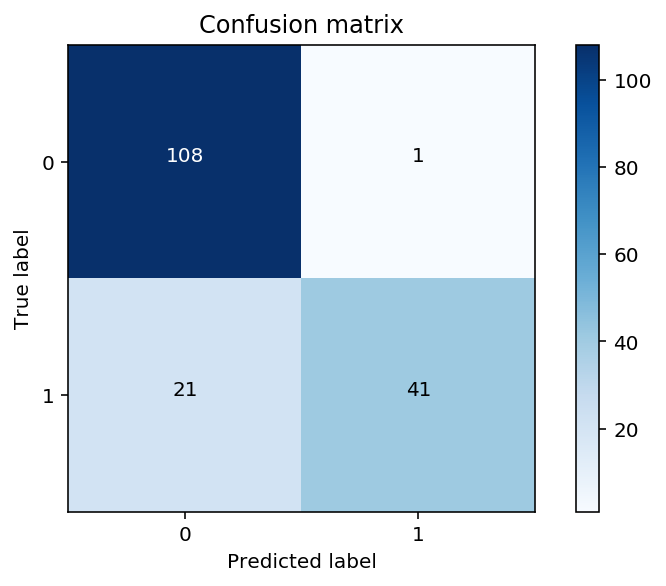

In [15]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

### xgboost

In [16]:
import xgboost as xgb

In [17]:
reg = xgb.XGBRegressor(n_estimators=1000, max_depth=12, learning_rate=0.1, subsample=1, colsample_bytree=0.9, random_state=8418, eval_metric='rmse',n_jobs=4)

In [18]:
reg.fit(xtrain, ytrain)

y_pred = reg.predict(xtest)

In [19]:
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.49%


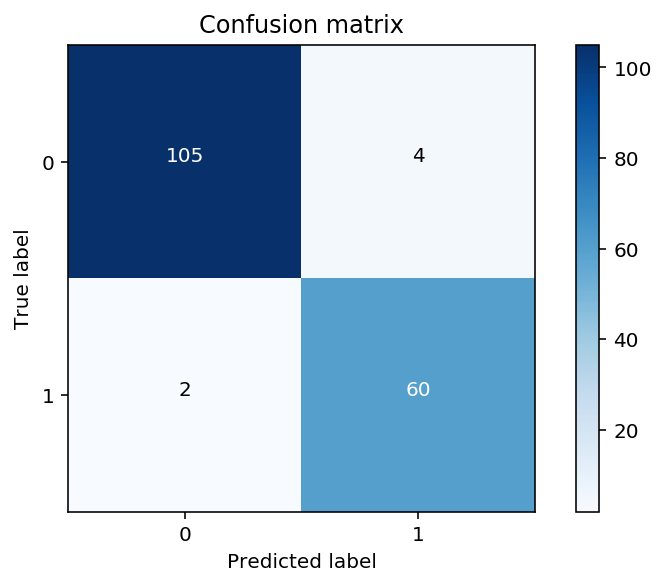

In [20]:
dat = confusion_matrix(ytest, predictions)

plot_confusion_matrix(
    dat, classes=[0,1], title='Confusion matrix')
plt.show()

XGBoost provides equal accuracy to random forest but training time is almost instant making xgboost the most efficient solution.